In [1]:
from autograd import V, L, F 
from optimiser import SGD, Adagrad, Adam
import matplotlib.pyplot as plt
import numpy as np

W1 = V.randn((1, 1), requires_grad=True, name='W1')
b1 = V.randn((1,), requires_grad=True, name='b1')

def model(x):
    x = x @ W1 + b1
    return x

# Function to match
def f(x):
    return x * 5.0 + 3.0

# Training data
def get_data():
    x = V.uniform((1,1), 0.0, 10.0)
    y = f(x)
    return x, y

loss = L.huberloss
optimiser = SGD(W1, b1, lr=0.01)

Loading autograd...
Loading optimiser...


loss_val () var(0.01182418168605195)
[0.0, 0.10101010101010101, 0.20202020202020202, 0.30303030303030304, 0.40404040404040403, 0.5050505050505051, 0.6060606060606061, 0.7070707070707071, 0.8080808080808081, 0.9090909090909091, 1.0101010101010102, 1.1111111111111112, 1.2121212121212122, 1.3131313131313131, 1.4141414141414141, 1.5151515151515151, 1.6161616161616161, 1.7171717171717171, 1.8181818181818181, 1.9191919191919191, 2.0202020202020203, 2.121212121212121, 2.2222222222222223, 2.323232323232323, 2.4242424242424243, 2.525252525252525, 2.6262626262626263, 2.727272727272727, 2.8282828282828283, 2.929292929292929, 3.0303030303030303, 3.131313131313131, 3.2323232323232323, 3.3333333333333335, 3.4343434343434343, 3.5353535353535355, 3.6363636363636362, 3.7373737373737375, 3.8383838383838382, 3.9393939393939394, 4.040404040404041, 4.141414141414141, 4.242424242424242, 4.343434343434343, 4.444444444444445, 4.545454545454545, 4.646464646464646, 4.747474747474747, 4.848484848484849, 4.949494

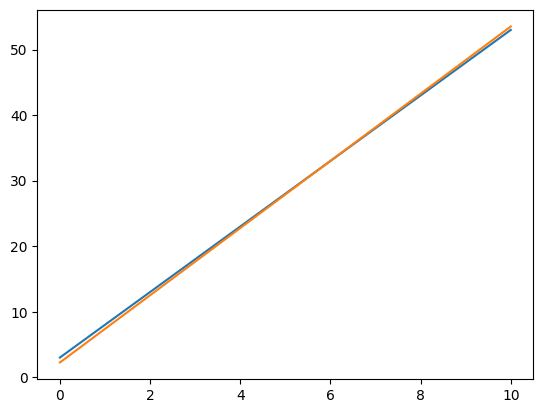

In [3]:
for e in range(100):
    x, y = get_data()

    y_pred = model(x)

    loss_val = loss(y_pred, y, keepdims=False)
    loss_val.backward()
    optimiser.step()

print("loss_val", loss_val.shape(), loss_val)

# Plotting
xs = [x for x in np.linspace(0.0, 10.0, 100)]
ys = [f(V.of(x)).item() for x in xs]
ys_pred = [model(V.of([x])).item() for x in xs]

plt.plot(xs, ys, label='f(x)')
plt.plot(xs, ys_pred, label='model(x)')
plt.show()